In [ ]:
import pandas, numpy
import sklearn, sklearn.preprocessing

import seaborn
seaborn.set_theme(style="whitegrid", font_scale=2)

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(9, 6)})

# User-defined variables

In [ ]:
data_file = '/content/drive/MyDrive/hi/research/huvec/data/untargetted/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches_untransformed.xlsx'
original_data = pandas.read_excel(data_file)
original_data.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,287.490913,468.605181,189.373225,576.720535,321.251154,490.368895,6963.243332,1574.419726,205.341230,224.308740,273.927171,877.335573,470.892562,333.699610,328.664004,451.849107,255.823982,427.261020,809.868345,187.765964,2379.782477,1794.563908,301.687304,343.101666,9183.700633,1617.937473,501.692771,1423.538506,540.586777,6996.861661,164.560730,3803.668263,788.843769,7948.654401,...,2914.012027,1377.308725,459.196085,911.317857,648.750017,1306.241545,1036.776239,333.258836,340.560957,594.988448,511.016845,565.775508,471.063525,508.009050,523.419610,1716.136440,2546.638937,2609.318638,1956.692269,441.883890,441.863417,660.379119,840.826958,760.880568,695.286961,817.192215,991.108049,976.389606,418.349805,465.041623,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,180.314261,538.342307,130.499826,603.217924,474.653477,426.956672,3643.910179,1315.831068,154.358128,170.502985,141.419741,1008.719708,260.182278,307.853534,385.353900,394.298563,257.420961,356.154982,893.362617,146.362903,2221.776633,1899.102687,346.257780,563.510648,12745.771755,1758.926679,568.463687,1598.700980,864.849029,11251.661840,126.246838,6095.439939,931.007398,11289.340126,...,877.387875,483.564382,356.341304,334.613655,237.253390,933.935392,971.276817,230.447689,232.782617,528.532968,859.251759,759.416550,715.501147,755.374832,802.264420,2518.407027,2168.859733,3861.084636,2760.544162,245.639511,238.226015,490.326750,496.843251,459.357601,848.163388,1008.164445,1206.062256,1192.698376,590.837772,720.730101,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,284.725250,346.699905,391.221386,430.336737,513.463286,895.284301,4228.235643,1443.006843,212.677132,391.189120,184.021619,380.373754,372.662550,854.720268,261.902817,454.430091,465.153277,610.078689,2284.832782,204.582924,3187.175952,3592.198479,389.760628,356.037317,19204.944485,2452.583144,645.812813,1358.152164,675.211871,8879.085049,229.784299,3715.155160,754.295076,2480.943852,...,273.659818,312.259142,293.755459,289.046341,180.474782,448.236634,443.534949,112.227982,112.674243,520.065709,475.640395,443.721159,565.961718,573.122668,572.232220,1453.883817,2247.032011,1237.646837,1778.598486,94.002886,91.201836,290.172797,258.341331,302.159835,539.552561,715.857145,890.422482,811.119499,322.999474,434.417560,430.145981,471.505944,371.

# Normalize data by cell numbers

In [ ]:
info = original_data.iloc[:, :6]
info.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME
0,EC_Rosa_1_659,4,EGM,1,480000.0,0
1,EC_Rosa_1_666,5,EGM,1,480000.0,0
2,EC_Rosa_1_668,3,EGM,1,480000.0,0
3,EC_Rosa_1_695,31,EGM,2,NaN,0
4,EC_Rosa_1_711,32,EGM,2,NaN,0


In [ ]:
intensities = original_data.iloc[:, 6:]
intensities.head()

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,X97.009529999999998,X100.0742,X102.02508,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,287.490913,468.605181,189.373225,576.720535,321.251154,490.368895,6963.243332,1574.419726,205.341230,224.308740,273.927171,877.335573,470.892562,333.699610,328.664004,451.849107,255.823982,427.261020,809.868345,187.765964,2379.782477,1794.563908,301.687304,343.101666,9183.700633,1617.937473,501.692771,1423.538506,540.586777,6996.861661,164.560730,3803.668263,788.843769,7948.654401,15857.020909,419.516347,6497.716679,1078.433195,169.377827,179.527448,...,2914.012027,1377.308725,459.196085,911.317857,648.750017,1306.241545,1036.776239,333.258836,340.560957,594.988448,511.016845,565.775508,471.063525,508.009050,523.419610,1716.136440,2546.638937,2609.318638,1956.692269,441.883890,441.863417,660.379119,840.826958,760.880568,695.286961,817.192215,991.108049,976.389606,418.349805,465.041623,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,180.314261,538.342307,130.499826,603.217924,474.653477,426.956672,3643.910179,1315.831068,154.358128,170.502985,141.419741,1008.719708,260.182278,307.853534,385.353900,394.298563,257.420961,356.154982,893.362617,146.362903,2221.776633,1899.102687,346.257780,563.510648,12745.771755,1758.926679,568.463687,1598.700980,864.849029,11251.661840,126.246838,6095.439939,931.007398,11289.340126,15395.190227,366.601488,6270.555226,850.936876,210.759353,122.288292,...,877.387875,483.564382,356.341304,334.613655,237.253390,933.935392,971.276817,230.447689,232.782617,528.532968,859.251759,759.416550,715.501147,755.374832,802.264420,2518.407027,2168.859733,3861.084636,2760.544162,245.639511,238.226015,490.326750,496.843251,459.357601,848.163388,1008.164445,1206.062256,1192.698376,590.837772,720.730101,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,284.725250,346.699905,391.221386,430.336737,513.463286,895.284301,4228.235643,1443.006843,212.677132,391.189120,184.021619,380.373754,372.662550,854.720268,261.902817,454.430091,465.153277,610.078689,2284.832782,204.582924,3187.175952,3592.198479,389.760628,356.037317,19204.944485,2452.583144,645.812813,1358.152164,675.211871,8879.085049,229.784299,3715.155160,754.295076,2480.943852,16171.140136,757.434438,10651.775980,1655.293914,310.782738,163.784634,...,273.659818,312.259142,293.755459,289.046341,180.474782,448.236634,443.534949,112.227982,112.674243,520.065709,475.640395,443.721159,565.961718,573.122668,572.232220,1453.883817,2247.032011,1237.646

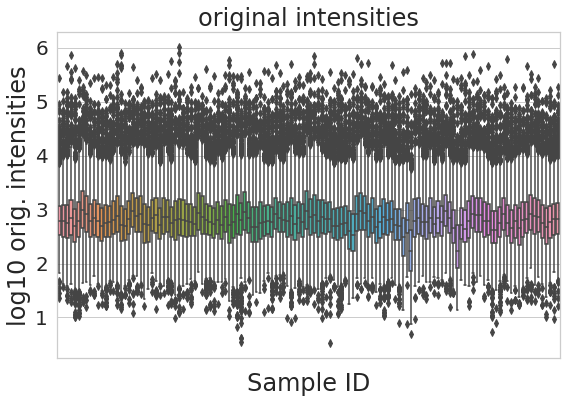

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
plotting_data = intensities.transpose()
plotting_data.head()

g = seaborn.boxplot(data=numpy.log10(plotting_data))
g.set(xticklabels=[], ylabel='log10 orig. intensities', xlabel='Sample ID', title='original intensities')
g.tick_params(bottom=False)
matplotlib.pyplot.show()

In [ ]:
intensities_by_cell = intensities.div(original_data['Cell  number']/1e6, axis=0)
intensities_by_cell.head(10)

,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,X97.009529999999998,X100.0742,X102.02508,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,570.681606,1827.782444,981.026172,695.207521,684.716675,941.352305,532.966630,890.127126,1687.225719,391.179091,4957.880161,3738.674808,628.515216,714.795137,19132.709653,3370.703068,1045.193274,2965.705220,1126.222452,14576.795128,342.834854,7924.308880,1643.424519,16559.696669,33035.460227,873.992391,13536.909747,2246.735823,352.870474,374.015516,...,6070.858389,2869.393177,956.658510,1898.578868,1351.562534,2721.336552,2159.950497,694.289242,709.501994,1239.559267,1064.618427,1178.698975,981.382345,1058.352188,1090.457521,3575.284249,5305.497785,5436.080495,4076.442228,920.591438,920.548785,1375.789831,1751.722828,1585.167849,1448.514503,1702.483781,2064.808436,2034.145011,871.562094,968.836715,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,294.624460,2101.499392,542.046412,641.361529,802.820624,821.455340,536.293668,741.989545,1861.172118,304.922715,4628.701319,3956.463931,721.370375,1173.980517,26553.691157,3664.430581,1184.299349,3330.627042,1801.768811,23440.962167,263.014245,12698.833206,1939.598746,23519.458597,32073.312973,763.753101,13063.656722,1772.785159,439.081986,254.767275,...,1827.891406,1007.425796,742.377716,697.111781,494.277895,1945.698734,2023.493370,480.099351,484.963786,1101.110349,1790.107830,1582.117813,1490.627390,1573.697567,1671.384208,5246.681307,4518.457777,8043.926325,5751.133672,511.748981,496.304199,1021.514063,1035.090106,956.995003,1767.007059,2100.342593,2512.629699,2484.788283,1230.912026,1501.521043,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,383.378373,792.445320,776.380311,1780.667226,545.630870,946.729356,969.069326,1270.997269,4760.068295,426.214425,6639.949900,7483.746831,812.001309,741.744410,40010.301010,5109.548216,1345.443361,2829.483675,1406.691398,18498.093853,478.717289,7739.906584,1571.448075,5168.633026,33689.875284,1577.988412,22191.199959,3448.528988,647.464037,341.217986,...,570.124622,650.539878,611.990539,602.179877,375.989130,933.826321,924.031144,233.808296,234.738007,1083.470226,990.917489,924.41908

In [ ]:
normalized_met_by_cell = pandas.concat([info, intensities_by_cell.reindex(info.index)], axis=1)
normalized_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,570.681606,1827.782444,981.026172,695.207521,684.716675,941.352305,532.966630,890.127126,1687.225719,391.179091,4957.880161,3738.674808,628.515216,714.795137,19132.709653,3370.703068,1045.193274,2965.705220,1126.222452,14576.795128,342.834854,7924.308880,1643.424519,16559.696669,...,6070.858389,2869.393177,956.658510,1898.578868,1351.562534,2721.336552,2159.950497,694.289242,709.501994,1239.559267,1064.618427,1178.698975,981.382345,1058.352188,1090.457521,3575.284249,5305.497785,5436.080495,4076.442228,920.591438,920.548785,1375.789831,1751.722828,1585.167849,1448.514503,1702.483781,2064.808436,2034.145011,871.562094,968.836715,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,294.624460,2101.499392,542.046412,641.361529,802.820624,821.455340,536.293668,741.989545,1861.172118,304.922715,4628.701319,3956.463931,721.370375,1173.980517,26553.691157,3664.430581,1184.299349,3330.627042,1801.768811,23440.962167,263.014245,12698.833206,1939.598746,23519.458597,...,1827.891406,1007.425796,742.377716,697.111781,494.277895,1945.698734,2023.493370,480.099351,484.963786,1101.110349,1790.107830,1582.117813,1490.627390,1573.697567,1671.384208,5246.681307,4518.457777,8043.926325,5751.133672,511.748981,496.304199,1021.514063,1035.090106,956.995003,1767.007059,2100.342593,2512.629699,2484.788283,1230.912026,1501.521043,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,383.378373,792.445320,776.380311,1780.667226,545.630870,946.729356,969.069326,1270.997269,4760.068295,426.214425,6639.949900,7483.746831,812.001309,741.744410,40010.301010,5109.548216,1345.443361,2829.483675,1406.691398,18498.093853,478.717289,7739.906584,1571.448075,5168.633026,...,570.124622,650.539878,611.990539,602.179877,375.989130,933.826321,924.031144,233.808296,234.738007,1083.470226,990.917489,924.419081,1179.086912,1194.005559,1192.150458,3028.924618,4681.316689,2578.430911,3705.413513,195.839345,190.003825,604.526660,538.211107,629.499656,1124.067835,1491.369053,

In [ ]:
# remove conditions for which cell numbers are not available
print('conditions before filtering {}'.format(normalized_met_by_cell.shape[0]))
finite_normalized_met_by_cell = normalized_met_by_cell[numpy.isfinite(normalized_met_by_cell['Cell  number']) == True]
print('conditions after filtering {}'.format(finite_normalized_met_by_cell.shape[0]))

conditions before filtering 130
conditions after filtering 121


In [ ]:
finite_normalized_met_by_cell.columns[finite_normalized_met_by_cell.isna().any()].tolist()

[]

In [ ]:
finite_normalized_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,598.939402,976.260794,394.527553,1201.501115,669.273238,1021.601865,14506.756942,3280.041095,427.794229,467.309876,570.681606,1827.782444,981.026172,695.207521,684.716675,941.352305,532.966630,890.127126,1687.225719,391.179091,4957.880161,3738.674808,628.515216,714.795137,19132.709653,3370.703068,1045.193274,2965.705220,1126.222452,14576.795128,342.834854,7924.308880,1643.424519,16559.696669,...,6070.858389,2869.393177,956.658510,1898.578868,1351.562534,2721.336552,2159.950497,694.289242,709.501994,1239.559267,1064.618427,1178.698975,981.382345,1058.352188,1090.457521,3575.284249,5305.497785,5436.080495,4076.442228,920.591438,920.548785,1375.789831,1751.722828,1585.167849,1448.514503,1702.483781,2064.808436,2034.145011,871.562094,968.836715,970.598168,1122.120807,927.564193,1056.978522,659.879879,3551.143913,4842.069410,6372.170942,4745.882797,4865.238129
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,375.654710,1121.546473,271.874638,1256.704008,988.861411,889.493067,7591.479539,2741.314726,321.579434,355.214552,294.624460,2101.499392,542.046412,641.361529,802.820624,821.455340,536.293668,741.989545,1861.172118,304.922715,4628.701319,3956.463931,721.370375,1173.980517,26553.691157,3664.430581,1184.299349,3330.627042,1801.768811,23440.962167,263.014245,12698.833206,1939.598746,23519.458597,...,1827.891406,1007.425796,742.377716,697.111781,494.277895,1945.698734,2023.493370,480.099351,484.963786,1101.110349,1790.107830,1582.117813,1490.627390,1573.697567,1671.384208,5246.681307,4518.457777,8043.926325,5751.133672,511.748981,496.304199,1021.514063,1035.090106,956.995003,1767.007059,2100.342593,2512.629699,2484.788283,1230.912026,1501.521043,1490.994224,1485.944833,1080.783137,1573.196955,257.338500,4857.239351,7046.775172,5200.748491,7127.975967,7358.118801
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,593.177604,722.291469,815.044553,896.534868,1069.715180,1865.175628,8808.824257,3006.264256,443.077358,814.977334,383.378373,792.445320,776.380311,1780.667226,545.630870,946.729356,969.069326,1270.997269,4760.068295,426.214425,6639.949900,7483.746831,812.001309,741.744410,40010.301010,5109.548216,1345.443361,2829.483675,1406.691398,18498.093853,478.717289,7739.906584,1571.448075,5168.633026,...,570.124622,650.539878,611.990539,602.179877,375.989130,933.826321,924.031144,233.808296,234.738007,1083.470226,990.917489,924.419081,1179.086912,1194.005559,1192.150458,3028.924618,4681.316689,2578.430911,3705.413513,195.839345,190.003825,604.526660,538.211107,629.499656,1124.067835,1491.369053,

# Visualize metabolites raw values

In [ ]:
peak_names = finite_normalized_met_by_cell.columns.to_list()[6:]
print(len(peak_names))
peak_names[:10]

1230


['X59.01097',
 'X61.017890000000001',
 'X67.016220000000004',
 'X74.021450000000002',
 'X77.052040000000005',
 'X77.052049999999994',
 'X78.956580000000002',
 'X78.956770000000006',
 'X79.955420000000004',
 'X80.962869999999995']

[Text(0, 0.5, 'Intensity'), Text(0.5, 0, 'Peak ID')]

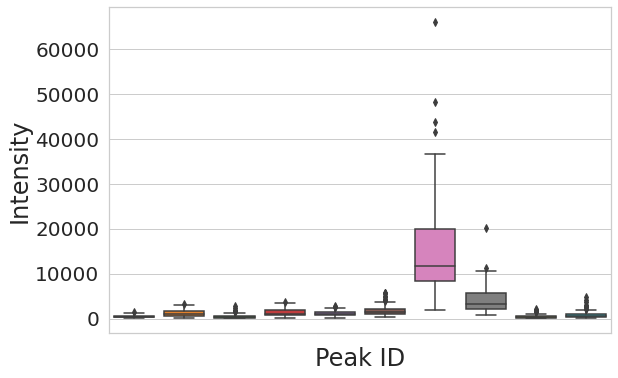

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=finite_normalized_met_by_cell[peak_names[:10]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='Intensity', xlabel='Peak ID')

[Text(0, 0.5, 'Intensity'), Text(0.5, 0, 'Peak ID')]

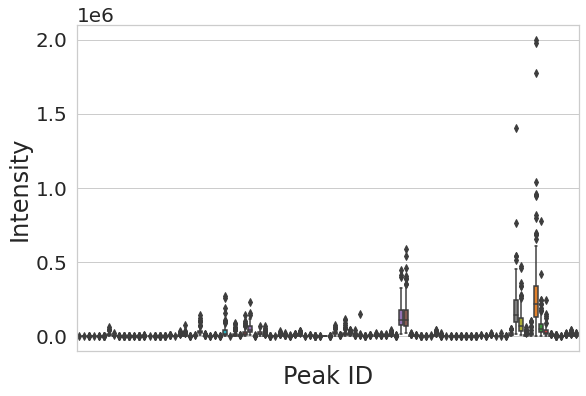

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=finite_normalized_met_by_cell[peak_names[:100]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='Intensity', xlabel='Peak ID')

[Text(0, 0.5, 'Intensity'), Text(0.5, 0, 'Peak ID')]

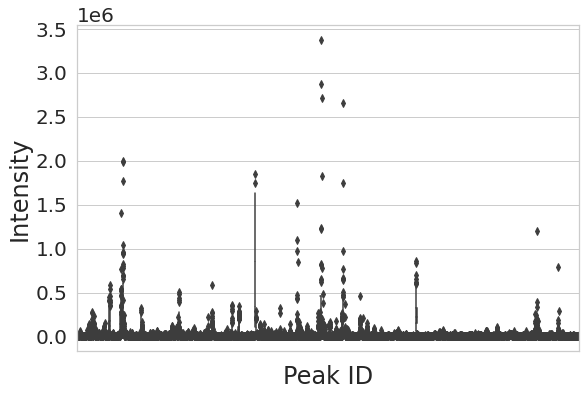

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=finite_normalized_met_by_cell[peak_names[:1000]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='Intensity', xlabel='Peak ID')

# Bring intensities to log10 scale

In [ ]:
info = finite_normalized_met_by_cell.iloc[:, :6]
data = finite_normalized_met_by_cell.iloc[:, 6:]
transformed = data.apply(numpy.log10)
log10_finite_normalize_met_by_cell = pandas.concat([info, transformed.reindex(info.index)], axis=1)
log10_finite_normalize_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,2.777383,2.989566,2.596077,3.079724,2.825603,3.009282,4.161570,3.515879,2.631235,2.669605,2.756394,3.261925,2.991681,2.842114,2.835511,2.973752,2.726700,2.949452,3.227173,2.592376,3.695296,3.572718,2.798316,2.854182,4.281776,3.527720,3.019197,3.472128,3.051624,4.163662,2.535085,3.898961,3.215750,4.219052,...,3.783250,3.457790,2.980757,3.278429,3.130836,3.434782,3.334444,2.841540,2.850954,3.093267,3.027194,3.071403,2.991838,3.024630,3.037609,3.553311,3.724726,3.735286,3.610281,2.964067,2.964047,3.138552,3.243465,3.200075,3.160923,3.231083,3.314880,3.308382,2.940298,2.986251,2.987039,3.050040,2.967344,3.024066,2.819465,3.550368,3.685031,3.804287,3.676317,3.687104
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,2.574789,3.049817,2.434369,3.099233,2.995135,2.949143,3.880326,3.437959,2.507288,2.550491,2.469269,3.322529,2.734036,2.807103,2.904619,2.914584,2.729403,2.870398,3.269787,2.484190,3.665459,3.597307,2.858158,3.069661,4.424125,3.564006,3.073461,3.522526,3.255699,4.369975,2.419979,4.103764,3.287712,4.371427,...,3.261950,3.003213,2.870625,2.843302,2.693971,3.289076,3.306102,2.681331,2.685709,3.041831,3.252879,3.199239,3.173369,3.196921,3.223076,3.719885,3.654990,3.905468,3.759753,2.709057,2.695748,3.009244,3.014978,2.980910,3.247238,3.322290,3.400128,3.395289,3.090227,3.176531,3.173476,3.172003,3.033739,3.196783,2.410505,3.686390,3.847990,3.716066,3.852966,3.866767
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,2.773185,2.858712,2.911181,2.952567,3.029268,3.270720,3.944918,3.478027,2.646480,2.911146,2.583628,2.898969,2.890075,3.250583,2.736899,2.976226,2.986355,3.104145,3.677613,2.629628,3.822165,3.874119,2.909557,2.870254,4.602172,3.708383,3.128865,3.451707,3.148199,4.267127,2.680079,3.888736,3.196300,3.713376,...,2.755970,2.813274,2.786745,2.779726,2.575175,2.970266,2.965687,2.368860,2.370583,3.034817,2.996037,2.965869,3.071546,3.077006,3.076331,3.481288,3.670368,3.411355,3.568837,2.291900,2.278762,2.781415,2.730953,2.798995,3.050793,3.173585,3.268355,3.227844,2.827961,2.956666,2.952375,2.992246,2.888343,3.064598,2.334000,3.595451,3.547835,3.587492,3.563889,3.558928
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,2.793198,3.261364,2.669590,3.367940,3.280535,3.445675,4.373775,3.903656,2.820162,2.815805,2.771533,3.444332,3.183399,3.200013,2.932876,3.256056,2.806004,3.306826,3.558245,2.871553,3.905686,3.915291,2.968110,2.845512,4.580069,3.889563,3.477014,3.812731,3.378651,3.883846,2.826934,4.434001,3.726279,4.768141,...,3.760187,3.639127,3.362112,3.404414,3.220208,3.908493,3.884432,3.332305,3.330

[Text(0, 0.5, 'log10 Intensity'), Text(0.5, 0, 'Peak ID')]

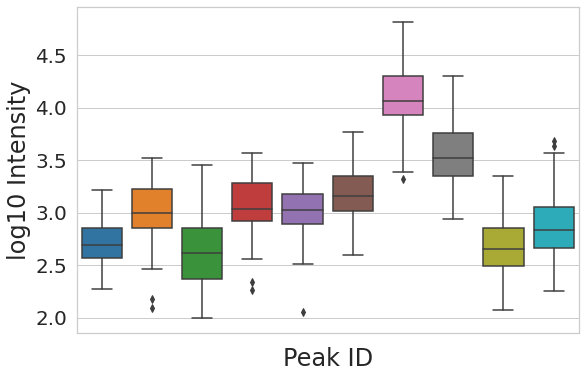

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:10]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity', xlabel='Peak ID')

[Text(0, 0.5, 'log10 Intensity'), Text(0.5, 0, 'Peak ID')]

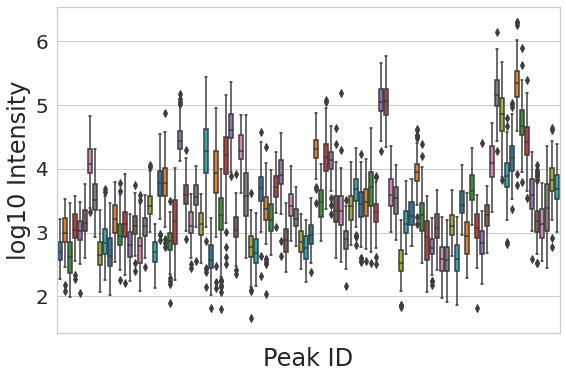

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:100]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity', xlabel='Peak ID')

[Text(0, 0.5, 'log10 Intensity'), Text(0.5, 0, 'Peak ID')]

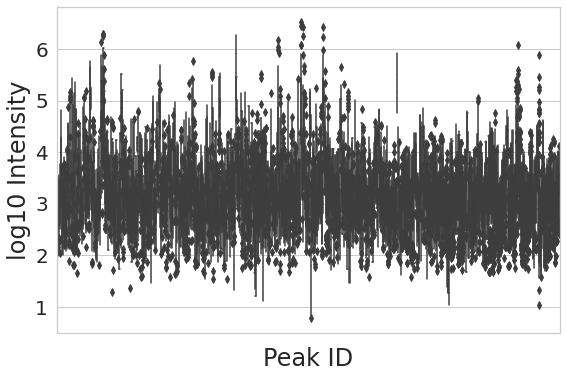

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=log10_finite_normalize_met_by_cell[peak_names[:1000]], palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity', xlabel='Peak ID')

# Correct sample shift

## visualize original values

In [ ]:
log10_finite_normalize_met_by_cell.head()

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,2.777383,2.989566,2.596077,3.079724,2.825603,3.009282,4.161570,3.515879,2.631235,2.669605,2.756394,3.261925,2.991681,2.842114,2.835511,2.973752,2.726700,2.949452,3.227173,2.592376,3.695296,3.572718,2.798316,2.854182,4.281776,3.527720,3.019197,3.472128,3.051624,4.163662,2.535085,3.898961,3.215750,4.219052,...,3.783250,3.457790,2.980757,3.278429,3.130836,3.434782,3.334444,2.841540,2.850954,3.093267,3.027194,3.071403,2.991838,3.024630,3.037609,3.553311,3.724726,3.735286,3.610281,2.964067,2.964047,3.138552,3.243465,3.200075,3.160923,3.231083,3.314880,3.308382,2.940298,2.986251,2.987039,3.050040,2.967344,3.024066,2.819465,3.550368,3.685031,3.804287,3.676317,3.687104
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,2.574789,3.049817,2.434369,3.099233,2.995135,2.949143,3.880326,3.437959,2.507288,2.550491,2.469269,3.322529,2.734036,2.807103,2.904619,2.914584,2.729403,2.870398,3.269787,2.484190,3.665459,3.597307,2.858158,3.069661,4.424125,3.564006,3.073461,3.522526,3.255699,4.369975,2.419979,4.103764,3.287712,4.371427,...,3.261950,3.003213,2.870625,2.843302,2.693971,3.289076,3.306102,2.681331,2.685709,3.041831,3.252879,3.199239,3.173369,3.196921,3.223076,3.719885,3.654990,3.905468,3.759753,2.709057,2.695748,3.009244,3.014978,2.980910,3.247238,3.322290,3.400128,3.395289,3.090227,3.176531,3.173476,3.172003,3.033739,3.196783,2.410505,3.686390,3.847990,3.716066,3.852966,3.866767
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,2.773185,2.858712,2.911181,2.952567,3.029268,3.270720,3.944918,3.478027,2.646480,2.911146,2.583628,2.898969,2.890075,3.250583,2.736899,2.976226,2.986355,3.104145,3.677613,2.629628,3.822165,3.874119,2.909557,2.870254,4.602172,3.708383,3.128865,3.451707,3.148199,4.267127,2.680079,3.888736,3.196300,3.713376,...,2.755970,2.813274,2.786745,2.779726,2.575175,2.970266,2.965687,2.368860,2.370583,3.034817,2.996037,2.965869,3.071546,3.077006,3.076331,3.481288,3.670368,3.411355,3.568837,2.291900,2.278762,2.781415,2.730953,2.798995,3.050793,3.173585,3.268355,3.227844,2.827961,2.956666,2.952375,2.992246,2.888343,3.064598,2.334000,3.595451,3.547835,3.587492,3.563889,3.558928
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,2.793198,3.261364,2.669590,3.367940,3.280535,3.445675,4.373775,3.903656,2.820162,2.815805,2.771533,3.444332,3.183399,3.200013,2.932876,3.256056,2.806004,3.306826,3.558245,2.871553,3.905686,3.915291,2.968110,2.845512,4.580069,3.889563,3.477014,3.812731,3.378651,3.883846,2.826934,4.434001,3.726279,4.768141,...,3.760187,3.639127,3.362112,3.404414,3.220208,3.908493,3.884432,3.332305,3.330

In [ ]:
tdf = log10_finite_normalize_met_by_cell.transpose()
tdf.drop(['Unnamed: 0', 'Number', 'Treatment', 'Batch', 'Cell  number', 'TIME'], axis=0, inplace=True)
tdf.head()

,0,1,2,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
X59.01097,2.77738,2.57479,2.77318,2.7932,2.88181,2.84624,2.71255,2.59348,2.65184,3.0116,2.92347,2.86511,2.57485,2.59573,2.67032,2.94878,3.00379,3.21399,2.48078,2.53113,2.66474,2.72336,2.94161,2.92199,2.85416,2.84893,2.75758,2.83245,2.97621,2.7984,2.74913,2.68164,2.69728,2.60618,2.59912,2.87326,3.06381,3.05746,2.7597,2.69746,...,2.69064,2.5672,2.78783,2.85265,2.94495,2.41325,2.39553,2.66992,2.72436,2.62954,2.75953,2.69226,2.75674,2.95062,2.65673,2.57787,2.77141,2.74386,2.69312,2.27605,2.50625,2.43741,2.27586,2.27673,2.30747,2.59381,2.30203,2.32815,2.57611,2.42698,2.47888,2.53103,2.55117,2.48812,2.97384,2.96249,2.94628,2.65582,2.68714,2.56044
X61.017890000000001,2.98957,3.04982,2.85871,3.26136,3.27432,3.22353,2.80274,2.98721,2.97751,3.24522,3.32576,3.08789,2.9994,3.08164,3.10333,3.43569,3.48205,3.44368,2.94588,2.46736,3.04181,3.11361,3.25349,3.22431,3.16582,3.25632,3.32092,3.3804,3.20407,3.07113,3.20028,3.29809,3.00982,2.63527,2.93684,3.39583,3.31721,3.52171,2.85049,2.73727,...,2.83114,2.9258,2.92204,3.02135,2.0914,2.82718,2.83407,3.01889,2.94796,3.0118,2.96195,3.20811,2.97025,2.98549,3.07311,2.98555,2.17211,3.10928,2.91066,2.77761,2.80711,2.84949,2.47976,2.72178,2.52838,2.69061,2.74998,2.78073,2.77519,2.73055,2.74588,2.8872,3.01786,2.86211,3.06273,3.25518,3.26392,2.84619,2.7389,2.89867
X67.016220000000004,2.59608,2.43437,2.91118,2.66959,2.53942,2.77434,2.78423,2.37662,2.73094,3.28674,2.5557,2.60427,2.19666,2.95533,2.65598,2.84468,2.35734,2.94214,2.88418,2.43282,2.58711,3.11812,2.50189,2.48304,2.89154,2.67897,3.27162,3.0149,2.67615,2.29852,2.92166,3.02167,2.85484,2.71997,2.40207,2.98947,2.79428,2.75408,2.59023,2.29766,...,2.12183,2.86875,2.13308,2.60479,1.99095,2.00651,2.29883,2.88514,2.07686,2.82237,2.5517,2.90949,2.81373,2.60296,3.13826,2.51675,2.13665,2.57559,2.94598,2.6368,2.6274,2.28847,2.11363,2.27126,2.16085,2.45966,2.36187,2.31434,2.14431,2.50032,2.21516,2.65272,2.79268,2.20609,3.05124,3.06669,2.43146,2.30668,2.61722,3.12101
X74.021450000000002,3.07972,3.09923,2.95257,3.36794,3.32465,3.34531,2.91894,2.88124,3.05306,3.3317,3.28216,3.34405,3.04552,3.09907,2.80496,3.54901,3.4792,3.52791,3.00264,2.74486,3.10915,3.22042,3.28332,3.22263,3.27366,3.30056,3.38602,3.37264,3.24507,3.15079,3.25244,3.34056,3.04741,2.89618,3.00958,3.45816,3.38424,3.56836,2.99086,2.93736,...,3.00684,2.90319,2.87054,3.09505,2.26664,2.80949,2.93823,3.10393,3.0283,3.12791,2.9358,3.16954,3.15486,3.16483,3.1423,3.01087,2.33564,3.50969,2.92342,2.88346,2.92515,2.90112,2.55421,2.65565,2.57937,2.70834,2.76538,2.76124,2.79154,2.7573,2.75324,2.92748,2.98518,2.96801,3.336,3.35074,3.32952,2.96826,2.88209,2.95071
X77.052040000000005,2.8256,2.99514,3.02927,3.28053,3.26156,3.29657,2.89219,2.75088,3.01315,3.20634,3.19639,3.24017,2.88777,2.94115,3.11396,3.36217,3.42536,3.44003,2.94331,3.01489,3.11801,3.13269,3.12488,3.0974,3.22717,3.14327,3.22733,3.34075,3.26131,3.07716,3.09181,3.19775,2.97078,3.02492,2.94564,3.35303,3.36825,3.47168,3.05297,3.0293,...,3.07645,2.90824,3.06099,3.17744,3.11392,2.75642,2.71474,3.08594,3.05753,3.01908,2.98664,2.97503,3.08604,3.05698,3.02299,3.14413,3.05204,2.94251,3.00934,2.76839,2.76979,2.64596,2.57967,2.05064,2.50953,2.81084,2.5875,2.75097,2.8345,2.82743,2.81819,2.85641,2.92791,2.8566,3.21762,3.38496,3.27667,2.93185,3.04211,2.94497


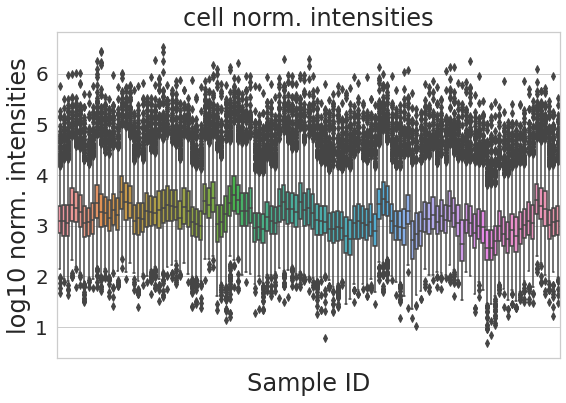

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=tdf)
g.set(xticklabels=[], ylabel='log10 norm. intensities', xlabel='Sample ID', title='cell norm. intensities')
g.tick_params(bottom=False)
matplotlib.pyplot.show()

## Quantile normalization

In [ ]:
# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(tdf.values, axis=0), index=tdf.index, columns=tdf.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
tdf.rank(method="min").astype(int)
df_qn = tdf.rank(method="min").stack().astype(int).map(df_mean).unstack()

## visualize transformed values

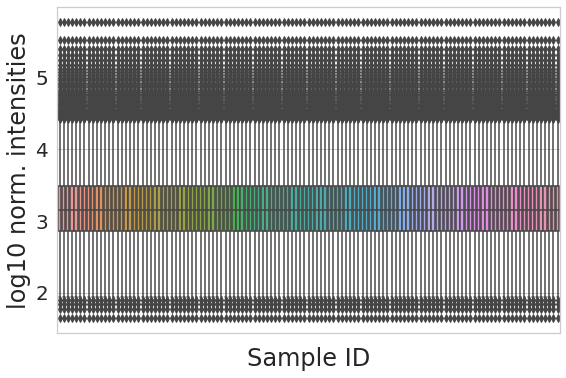

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=df_qn)
g.set(xticklabels=[], ylabel='log10 norm. intensities', xlabel='Sample ID')
g.tick_params(bottom=False)
matplotlib.pyplot.show()

## re-transpose to continue with downstream analysis

In [ ]:
qn_peaks = df_qn.transpose()
qn_peaks.insert(0, 'Batch', log10_finite_normalize_met_by_cell['Batch'])
qn_peaks.insert(0, 'Time', log10_finite_normalize_met_by_cell['TIME']) 
qn_peaks.insert(0, 'Treatment', log10_finite_normalize_met_by_cell['Treatment']) 
qn_peaks.insert(0, 'Sample ID', log10_finite_normalize_met_by_cell['Unnamed: 0'])
qn_peaks.head()

,Sample ID,Treatment,Time,Batch,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,EGM,0,1,2.794334,3.019640,2.627142,3.123284,2.840778,3.044494,4.241930,3.604565,2.656141,2.693374,2.769305,3.339273,3.021407,2.856860,2.851183,2.997638,2.737077,2.969590,3.301733,2.619606,3.760098,3.656105,2.814481,2.864709,4.436991,3.615250,3.055976,3.567557,3.095924,4.252304,2.542498,4.004539,3.285141,4.341391,4.638746,2.958944,...,3.866722,3.551394,3.006823,3.364583,3.176636,3.527140,3.435356,2.855961,2.863562,3.137896,3.066949,3.116731,3.023277,3.061422,3.080600,3.632922,3.796821,3.813846,3.691470,2.985127,2.984080,3.186189,3.318093,3.257652,3.205570,3.305885,3.413212,3.404561,2.956773,3.014100,3.014906,3.091518,2.990505,3.060599,2.835696,3.628641,3.750368,3.891556,3.745615,3.755109
1,EC_Rosa_1_666,EGM,0,1,2.607654,3.104925,2.412584,3.150455,3.051611,3.014100,3.970959,3.513098,2.507352,2.570862,2.449320,3.392637,2.782153,2.866827,2.974297,2.980404,2.776583,2.942496,3.324727,2.469142,3.757501,3.680008,2.926464,3.114162,4.602055,3.646917,3.117680,3.595610,3.303809,4.534818,2.402832,4.176775,3.342559,4.551079,4.660741,2.958944,...,3.310151,3.055130,2.943322,2.909232,2.737077,3.346718,3.364583,2.721569,2.726830,3.094173,3.301733,3.254715,3.233038,3.253464,3.273858,3.831795,3.743328,3.991180,3.870237,2.758256,2.739381,3.059703,3.067804,3.041605,3.294534,3.391437,3.474001,3.466064,3.138875,3.236934,3.233955,3.229593,3.083298,3.252518,2.398358,3.791086,3.932381,3.828591,3.944024,3.952900
2,EC_Rosa_1_668,EGM,0,1,2.837759,2.920775,2.981377,3.026136,3.121434,3.336177,4.019808,3.556427,2.700539,2.980404,2.627142,2.962937,2.955880,3.313042,2.800069,3.066949,3.080600,3.187098,3.748053,2.683602,3.903055,3.940286,2.975997,2.933154,4.584313,3.788200,3.209449,3.533157,3.227574,4.252304,2.741868,3.957548,3.263896,3.796821,4.475877,3.267948,...,2.819797,2.873058,2.853045,2.841717,2.617464,3.055130,3.049817,2.353734,2.359049,3.127882,3.093322,3.051611,3.160210,3.167661,3.163910,3.564117,3.743328,3.483438,3.649147,2.284995,2.267285,2.844849,2.793039,2.862742,3.139804,3.245766,3.333075,3.297725,2.888423,3.034113,3.025199,3.090544,2.948674,3.153500,2.334037,3.675726,3.622862,3.668984,3.644870,3.634795
9,EC_Rosa_1_787,EGM,0,4,2.534132,3.014100,2.353734,3.096735,3.034113,3.186189,4.169241,3.668984,2.563349,2.558397,2.507352,3.184457,2.960006,2.972406,2.677532,3.009588,2.542498,3.056899,3.318093,2.613817,3.673114,3.684199,2.721569,2.588837,4.436991,3.658235,3.216226,3.544906,3.108769,3.646917,2.566381,4.241930,3.466064,4.602055,4.801075,2.975240,...,3.491852,3.400055,3.092260,3.1

In [ ]:
# check for nan value---shouldn't be any
qn_peaks.columns[qn_peaks.isna().any()].tolist()

[]

# Explore batch effect

In [ ]:
metabolite_peak = 'X147.02834999999999' 
metabolite_name = '2-hydroxy glutarate'
treatment = 10
timepoint =  4
metabolite_plotting_range = [2.4, 3.7]

In [ ]:
#metabolite_peak = 'X262.03859999999997' 
#metabolite_name = 'adr sulf'
#treatment = 1
#timepoint =  4
#metabolite_plotting_range = [1.6, 2.4]

In [ ]:
sub = qn_peaks[(qn_peaks['Treatment'] == treatment) & (qn_peaks['Time'] == timepoint)]
sub.head(20)

,Sample ID,Treatment,Time,Batch,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
26,EC_Rosa_1_670,10,4,1,2.630583,3.058712,2.560540,3.115760,3.129682,3.146662,4.232325,3.444692,2.693374,3.007759,2.619606,3.235988,2.892207,2.913133,2.827061,3.116731,2.611755,2.981377,3.565695,2.665437,3.828591,3.834827,2.845997,3.199768,4.373071,3.527140,3.425930,3.743328,3.304907,4.341391,2.309636,3.962332,3.311081,4.270662,4.660741,3.198818,...,3.278888,3.228673,2.966808,3.100026,3.049817,2.637285,2.652790,1.948743,1.997291,3.082412,2.640527,2.764675,3.350026,3.287201,3.312010,3.723443,3.921495,3.895022,3.804659,2.216635,2.177612,2.483543,2.480258,2.497862,3.200687,3.275603,3.404561,3.377632,2.898183,2.941556,2.937727,3.015905,2.956773,3.245766,2.111426,3.677732,3.796821,3.837620,3.638206,3.810629
27,EC_Rosa_1_674,10,4,1,2.607654,2.994075,2.996840,3.087798,3.008652,3.135082,3.779479,3.562616,2.334037,2.724403,2.322685,3.047184,2.922687,3.055976,2.609714,3.039887,3.028698,3.124157,3.340367,2.619606,4.050685,4.093068,2.806355,3.880829,4.279178,3.554692,2.995944,3.510063,3.030448,4.775399,2.440263,4.534818,3.644870,4.397004,4.928936,2.899114,...,3.183577,3.397321,2.873993,3.094173,2.934159,3.064223,3.037822,2.660619,2.680762,3.070493,2.895302,3.032273,3.207600,3.216226,3.224538,3.559687,3.691470,3.762493,3.599150,2.718573,2.726830,2.928373,2.896255,2.892207,3.259555,3.335183,3.378773,3.375063,3.264814,3.402427,3.455777,3.372637,3.296673,3.235988,2.302421,3.686737,3.606541,3.684199,3.662340,3.689269
28,EC_Rosa_1_682,10,4,1,2.795501,3.127882,2.398358,3.158241,2.997638,3.108769,4.004539,3.356420,2.607654,2.731693,2.267285,3.091518,2.697621,3.020504,2.721569,3.051611,2.522662,2.988829,3.360786,2.575653,3.825645,3.962332,2.851183,3.496056,4.252304,3.489057,3.114938,3.586583,3.085262,4.752278,2.623564,4.241930,3.428217,4.422124,4.895349,3.156323,...,3.402427,3.479553,3.323560,3.392637,3.183577,2.276526,2.294389,1.773601,1.840547,3.161210,2.973414,3.037822,3.119569,3.310151,3.330885,3.718770,3.932381,3.936170,3.799645,2.061740,2.028580,1.901832,1.948743,2.132502,3.375063,3.418217,3.511282,3.193838,3.150455,3.151522,3.154365,3.217423,3.182565,3.237817,1.642718,3.710095,3.884510,3.948198,3.991180,3.910594
29,EC_Rosa_1_700,10,4,2,2.768072,3.116731,2.371112,3.113217,2.975997,3.200687,3.910594,3.415736,2.807416,2.816465,2.615554,3.398774,3.219162,3.005070,3.035062,2.845997,2.453340,2.978821,3.324727,2.788863,3.837620,3.936170,2.769305,3.514332,4.422124,3.644870,3.150455,3.600809,3.384662,4.019808,2.735767,3.928514,2.879644,4.191776,4.475877,3.303809,...,3.256555,3.813846,3.541470,3.5

In [ ]:
df = pandas.DataFrame()
batches = range(1, 5+1)
for batch_number in batches:
  tag = 'Batch{}'.format(batch_number)
  values = sub[sub['Batch'] == batch_number][metabolite_peak].values
  if len(values) == 2:
    values = numpy.insert(values, 0, numpy.mean(values))
  local = pandas.DataFrame({tag:values})
  df = pandas.concat((df, local), axis=1)
df.head()

,Batch1,Batch2,Batch3,Batch4,Batch5
0,3.174731,3.572627,2.739381,2.942496,3.110446
1,2.951434,3.628641,2.619606,2.720156,3.058712
2,2.873058,3.277820,2.878672,2.477066,3.352061


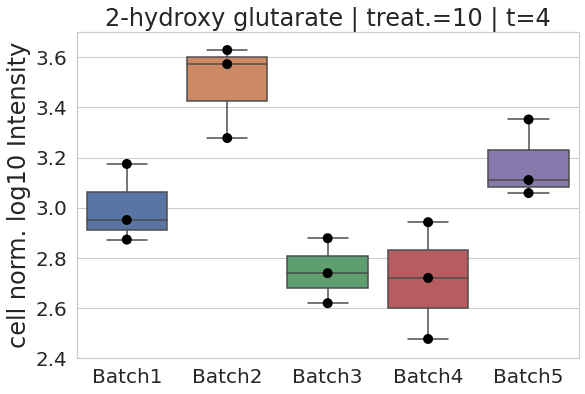

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df)
g = seaborn.swarmplot(data=df, color='black', size=10)
g.set(ylabel='cell norm. log10 Intensity', title='{} | treat.={} | t={}'.format(metabolite_name, treatment, timepoint), ylim=metabolite_plotting_range)
matplotlib.pyplot.show()

In [ ]:
#
# define function for quantile normalization
#
def quantile_normalization(df):

  "Quantile normalization consists on sorting, averaging and re-ordering."
  "For more information: https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/"
  
  ### check that each batch measurement is unique. If all batch measurements are the same, add noise
  noise = 0.01
  for label, values in df.iteritems():
    if len(values.unique()) == 1:
      v = values.unique()[0]
      df[label] = [v-noise, v, v+noise]

  # step 1/3: sorting sample values
  df_sorted = pandas.DataFrame(numpy.sort(df.values, axis=0), index=df.index, columns=df.columns)
  # step 2/3: averaging rank values across samples
  df_mean = df_sorted.mean(axis=1)
  df_mean.index = numpy.arange(1, len(df_mean) + 1)
  # step 3/3: re-ordering samples
  df.rank(method="min").astype(int)
  df_qn = df.rank(method="min").stack().astype(int).map(df_mean).unstack()

  ### two extra steps, outside of quantile normalization
  
  # (1/2) use df_qn as reference to map original values, so they can be merged later
  target_means = df_qn.mean(axis=0)
  target_sds = df_qn.std(axis=0)

  original_means = df.mean(axis=0)
  original_sds = df.std(axis=0)
  df_scaled = df.subtract(original_means, axis=1).div(original_sds, axis=1)

  df_target = df_scaled.mul(target_sds, axis=1).add(target_means, axis=1)

  # (2/2) join values as one single column
  joined_values = df_target.values.flatten()
  if sum(numpy.isnan(joined_values)) > 0:
    raise ValueError('found nan values after QN')

  ### case-specific convenience function to quantify batch shift
  bs = (df.mean(axis=0) - df_qn.mean(axis=0)) / df_qn.mean(axis=0)
  batch_shift = pandas.DataFrame(bs).transpose()

  return df_qn, df_target, joined_values, batch_shift

In [ ]:
df_qn, df_target, joined_values, batch_shift = quantile_normalization(df)

[(2.4, 3.7),
 Text(0, 0.5, ' QN cell norm. log10 Intensity'),
 Text(0.5, 1.0, '2-hydroxy glutarate | treat.=10 | t=4')]

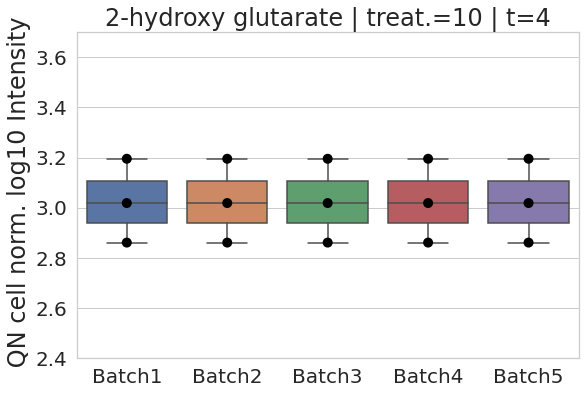

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df_qn)
g = seaborn.swarmplot(data=df_qn, color='black', size=10)
g.set(ylabel=' QN cell norm. log10 Intensity', title='{} | treat.={} | t={}'.format(metabolite_name, treatment, timepoint), ylim=metabolite_plotting_range)

[(2.4, 3.7),
 Text(0, 0.5, 'mapped cell norm. log10 Intensity'),
 Text(0.5, 1.0, '2-hydroxy glutarate | treat.=10 | t=4')]

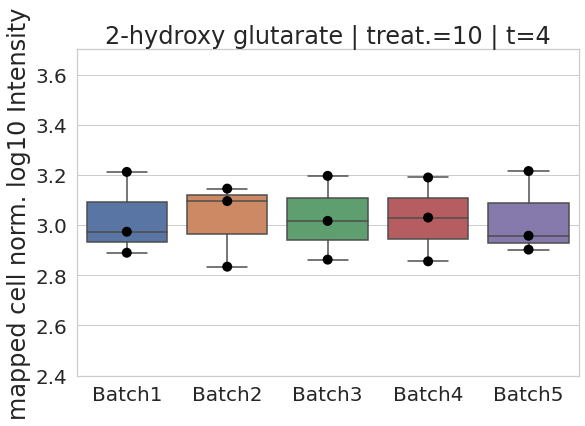

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df_target)
g = seaborn.swarmplot(data=df_target, color='black', size=10)
g.set(ylabel='mapped cell norm. log10 Intensity', title='{} | treat.={} | t={}'.format(metabolite_name, treatment, timepoint), ylim=metabolite_plotting_range)

In [ ]:
print(joined_values)
print(joined_values.shape)

[3.21195931 3.09570958 3.01674185 3.18971241 2.9575719  2.97355046
 3.14537951 2.86235404 3.03009269 2.902356   2.88987145 2.83429213
 3.19628532 2.85557612 3.21545332]
(15,)


Comparison to previous batch normalization

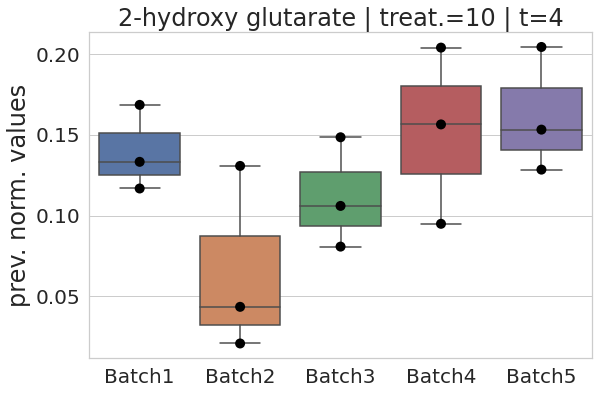

In [ ]:
previous_file = '/content/drive/MyDrive/hi/research/huvec/data/untargetted/AllBatchdata_BatchNorm.xlsx'
previous_data = pandas.read_excel(previous_file)

previous_sub = previous_data[(previous_data['Treatment'] == treatment) & (previous_data['TIME'] == timepoint)]

df = pandas.DataFrame()
for batch_number in batches:
  tag = 'Batch{}'.format(batch_number)
  values = previous_sub[previous_sub['Batch'] == batch_number][metabolite_peak].values
  if len(values) == 2:
    values = numpy.insert(values, 0, numpy.mean(values))
  local = pandas.DataFrame({tag:values})
  df = pandas.concat((df, local), axis=1)

matplotlib.pyplot.figure(figsize=(9, 6))
seaborn.boxplot(data=df)
g = seaborn.swarmplot(data=df, color='black', size=10)
g.set(ylabel='prev. norm. values', title='{} | treat.={} | t={}'.format(metabolite_name, treatment, timepoint))
matplotlib.pyplot.show()

# Correct batch effect

In [ ]:
# working variable should be qn_peaks
qn_peaks.head()

,Sample ID,Treatment,Time,Batch,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,EGM,0,1,2.794334,3.019640,2.627142,3.123284,2.840778,3.044494,4.241930,3.604565,2.656141,2.693374,2.769305,3.339273,3.021407,2.856860,2.851183,2.997638,2.737077,2.969590,3.301733,2.619606,3.760098,3.656105,2.814481,2.864709,4.436991,3.615250,3.055976,3.567557,3.095924,4.252304,2.542498,4.004539,3.285141,4.341391,4.638746,2.958944,...,3.866722,3.551394,3.006823,3.364583,3.176636,3.527140,3.435356,2.855961,2.863562,3.137896,3.066949,3.116731,3.023277,3.061422,3.080600,3.632922,3.796821,3.813846,3.691470,2.985127,2.984080,3.186189,3.318093,3.257652,3.205570,3.305885,3.413212,3.404561,2.956773,3.014100,3.014906,3.091518,2.990505,3.060599,2.835696,3.628641,3.750368,3.891556,3.745615,3.755109
1,EC_Rosa_1_666,EGM,0,1,2.607654,3.104925,2.412584,3.150455,3.051611,3.014100,3.970959,3.513098,2.507352,2.570862,2.449320,3.392637,2.782153,2.866827,2.974297,2.980404,2.776583,2.942496,3.324727,2.469142,3.757501,3.680008,2.926464,3.114162,4.602055,3.646917,3.117680,3.595610,3.303809,4.534818,2.402832,4.176775,3.342559,4.551079,4.660741,2.958944,...,3.310151,3.055130,2.943322,2.909232,2.737077,3.346718,3.364583,2.721569,2.726830,3.094173,3.301733,3.254715,3.233038,3.253464,3.273858,3.831795,3.743328,3.991180,3.870237,2.758256,2.739381,3.059703,3.067804,3.041605,3.294534,3.391437,3.474001,3.466064,3.138875,3.236934,3.233955,3.229593,3.083298,3.252518,2.398358,3.791086,3.932381,3.828591,3.944024,3.952900
2,EC_Rosa_1_668,EGM,0,1,2.837759,2.920775,2.981377,3.026136,3.121434,3.336177,4.019808,3.556427,2.700539,2.980404,2.627142,2.962937,2.955880,3.313042,2.800069,3.066949,3.080600,3.187098,3.748053,2.683602,3.903055,3.940286,2.975997,2.933154,4.584313,3.788200,3.209449,3.533157,3.227574,4.252304,2.741868,3.957548,3.263896,3.796821,4.475877,3.267948,...,2.819797,2.873058,2.853045,2.841717,2.617464,3.055130,3.049817,2.353734,2.359049,3.127882,3.093322,3.051611,3.160210,3.167661,3.163910,3.564117,3.743328,3.483438,3.649147,2.284995,2.267285,2.844849,2.793039,2.862742,3.139804,3.245766,3.333075,3.297725,2.888423,3.034113,3.025199,3.090544,2.948674,3.153500,2.334037,3.675726,3.622862,3.668984,3.644870,3.634795
9,EC_Rosa_1_787,EGM,0,4,2.534132,3.014100,2.353734,3.096735,3.034113,3.186189,4.169241,3.668984,2.563349,2.558397,2.507352,3.184457,2.960006,2.972406,2.677532,3.009588,2.542498,3.056899,3.318093,2.613817,3.673114,3.684199,2.721569,2.588837,4.436991,3.658235,3.216226,3.544906,3.108769,3.646917,2.566381,4.241930,3.466064,4.602055,4.801075,2.975240,...,3.491852,3.400055,3.092260,3.1

In [ ]:
treatments = ['EGM', 1, 10, 100]
timepoints = [0, 4, 24]

conditions = [('EGM', 0), ('EGM', 4), ('EGM', 24)]
for treatment in treatments[1:]:
    for timepoint in timepoints[1:]:
        condition = (treatment, timepoint)
        conditions.append(condition)
print(conditions)

[('EGM', 0), ('EGM', 4), ('EGM', 24), (1, 4), (1, 24), (10, 4), (10, 24), (100, 4), (100, 24)]


In [ ]:
all_columns = ['Treatment', 'Time', 'Replicate'] + peak_names
peaks_ic = pandas.DataFrame(columns=all_columns)
batch_shift_ic = pandas.DataFrame(columns=['Batch' + str(batch_number) for batch_number in batches])

for condition in conditions:
  treatment = condition[0]; timepoint = condition[1]
  container = {}
  for peak_name in peak_names:

    # (1/2) retrieve specific data
    sub = qn_peaks[(qn_peaks['Treatment'] == treatment) & (qn_peaks['Time'] == timepoint)]

    before_values = {}
    for batch_number in batches:
      values = sub[sub['Batch'] == batch_number][peak_name].values
      # impute an average value in case of two values (Batch 5)
      if len(values) == 2:
        #print('imputing...')
        values = numpy.insert(values, 0, numpy.mean(values))
      if len(values) > 0:
        before_values['Batch{}'.format(batch_number)] = values

    df = pandas.DataFrame(before_values)

    # (2/2) quantile normalization
    df_qn, df_target, joined_values, batch_shift = quantile_normalization(df)

    # (3/3) store information as needed
    container[peak_name] = joined_values

    batch_shift_ic = pandas.concat([batch_shift_ic, batch_shift], axis=0)
  
  # final storage
  for i in range(len(joined_values)):
    local_container = {'Replicate':i, 'Treatment':treatment, 'Time':timepoint}
    for peak_name in container:
      local_container[peak_name] = container[peak_name][i]
    peaks_ic = peaks_ic.append(local_container, ignore_index=True)  

In [ ]:
peaks_ic.head()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0,0,2.731190,3.039996,2.498900,3.146793,2.926058,3.101473,4.249783,3.659928,2.675828,2.698426,2.835321,3.263095,3.015066,2.938611,2.771732,2.994916,2.569723,2.977499,3.331975,2.662741,3.665733,3.645038,2.769425,2.743793,4.397969,3.612091,3.062474,3.608017,3.098851,3.949611,2.609377,3.924130,3.195544,4.520370,4.703177,2.949756,4.252155,...,3.684713,3.504004,3.118662,3.310416,3.110021,3.646444,3.556255,2.969109,2.971801,3.184817,2.769092,2.892342,3.024038,3.064213,3.085544,3.635307,3.859158,3.857018,3.728960,3.087690,3.087883,3.428445,3.493868,3.400716,3.214216,3.334671,3.384709,3.415102,2.978815,3.022200,3.021206,2.995128,3.012682,3.068779,3.026200,3.681500,3.728084,3.902864,3.798414,3.779298
1,EGM,0,1,2.577060,2.966918,2.478636,3.080018,2.975931,3.142122,4.154512,3.619230,2.579870,2.562354,2.487779,3.258477,2.886799,2.854834,2.756858,3.007140,2.691261,3.068997,3.254947,2.539483,3.745788,3.727281,2.766418,2.712809,4.476157,3.668902,3.185888,3.538519,3.105857,3.923285,2.471512,4.182124,3.390994,4.219277,4.737366,2.993527,4.222383,...,3.625102,3.257475,2.969984,2.943847,2.821723,3.572133,3.534212,2.957405,2.959623,3.138686,2.805983,2.881742,3.038560,3.072207,3.068547,3.562690,3.816319,3.637790,3.717931,3.045000,3.049544,3.361241,3.383137,3.186481,3.128215,3.269217,3.395243,3.347042,3.103678,3.182975,3.197100,3.191962,3.090010,3.086108,2.856756,3.666367,3.817882,3.767177,3.784470,3.692333
2,EGM,0,2,2.567796,3.102377,2.315301,3.174088,3.080577,3.078214,3.950247,3.553190,2.447427,2.567267,2.467664,3.299520,2.868828,2.944417,2.891972,2.964754,2.616670,2.956515,3.345296,2.543528,3.662276,3.662167,2.855282,2.924238,4.572164,3.640099,3.137590,3.662951,3.321059,4.618832,2.497167,4.263248,3.499691,4.645017,4.724440,2.949756,4.259571,...,3.372456,3.223758,3.059874,3.043612,2.866050,3.409097,3.457334,2.832361,2.832637,3.139151,2.979729,3.026377,3.250336,3.299959,3.271043,3.775912,3.706156,3.971052,3.853376,2.860173,2.848091,3.188977,3.151786,3.090118,3.307722,3.408314,3.476060,3.459793,3.107535,3.193450,3.201853,3.251763,3.087607,3.325044,2.495992,3.780564,3.908326,3.861871,3.913619,3.892816
3,EGM,0,3,2.700993,3.041685,2.328574,3.091159,2.993070,3.046918,4.165901,3.546743,2.492790,2.705565,2.633503,3.303501,2.936790,3.100368,2.895259,3.112989,2.514703,2.908327,3.495694,2.696874,3.828928,3.827009,2.881977,2.872404,4.615308,3.755558,3.043079,3.613132,3.223012,4.592933,2.670872,3.749708,3.376602,4.460777,4.687126,2.928184,4.299938,...,3.057176,3.492650,3.103422,3.275411,

In [ ]:
peaks_ic.tail()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
118,100,24,7,2.779846,3.172528,2.963769,3.251544,2.761526,3.189147,3.857269,3.547562,2.794847,3.092258,2.737097,3.605848,3.018233,3.491667,3.275045,3.133100,3.056535,3.174188,3.533657,2.594479,3.689094,3.714310,2.971458,2.825774,4.669546,3.545488,3.195822,3.725644,3.374152,3.497405,2.620633,3.636093,2.700929,3.699722,4.379809,3.134810,4.281648,...,3.412555,3.343679,3.233994,3.259055,3.101473,3.451623,3.416797,2.847239,2.874780,3.152409,2.398058,2.569447,2.943948,2.980310,3.081267,3.460729,3.769201,3.613009,3.585331,2.815918,2.870109,3.135412,3.132977,3.157925,3.075960,3.176898,3.371516,3.234949,2.641204,2.555562,2.588433,2.790295,2.704459,3.055224,2.654439,3.312947,3.594402,3.602590,3.522195,3.542725
119,100,24,8,2.724025,3.133532,2.647625,3.245464,3.240781,3.462044,4.146592,3.631893,2.605105,3.086511,2.585463,3.545683,3.188624,3.103541,3.220117,3.147548,2.889497,3.063117,3.554323,2.835654,3.600071,3.600101,2.754748,2.838818,4.678423,3.963475,3.427914,3.688255,3.447576,3.496839,2.693934,3.893874,3.147545,4.123796,4.705906,3.031205,4.357809,...,3.410136,2.902644,2.724620,2.692386,2.631447,2.713433,2.766456,2.142090,2.189284,3.139194,2.714819,2.855977,3.255281,3.276307,3.224910,3.428231,3.924068,3.922055,3.803657,2.298367,2.287134,2.545044,2.567356,2.592580,3.320348,3.393158,3.483537,3.423907,2.942423,2.727995,2.828934,2.951793,3.020111,3.267789,2.152626,3.748962,3.874495,3.837302,3.871287,3.820243
120,100,24,9,2.682043,3.035865,2.960725,3.047795,2.949646,3.273423,4.064389,3.445400,2.669558,3.013672,2.505473,3.299289,2.968582,3.460443,2.925316,3.143381,3.036081,3.286117,3.644621,2.695905,3.913832,3.983290,2.987151,3.125915,4.771909,3.935270,3.193978,3.609409,3.083960,4.227110,2.498260,4.014369,3.061519,3.781029,4.610194,3.098704,4.451747,...,2.679282,3.479473,3.245823,3.260162,3.171657,2.528612,2.585151,2.047288,2.090823,2.956547,2.631055,2.753864,3.092275,3.137273,3.133400,3.592873,3.817061,3.630503,3.705596,2.230575,2.220721,2.395682,2.414022,2.458296,3.146984,3.241251,3.356068,3.309874,2.830697,2.831802,2.884726,2.955181,2.822045,3.137322,2.050516,3.608898,3.770203,3.810570,3.823127,3.706630
121,100,24,10,2.788015,3.051387,2.434155,3.047309,2.829969,3.312372,4.180174,3.465960,2.565611,2.630849,2.510421,3.071950,3.194024,3.414198,2.758612,3.334046,2.698242,3.151275,3.563229,2.833825,3.854702,3.980528,2.909117,3.048682,4.694549,3.960340,3.414742,3.683846,3.154142,3.873801,2.561117,3.914787,2.960480,3.700028,4.692343,3.144591,4.452374,...,2.962302,3.125153,2.937

In [ ]:
batch_shift_ic.head()
print(batch_shift_ic.shape)

(11070, 5)


In [ ]:
11070/len(peak_names)

9.0

# Visualize batch shifts



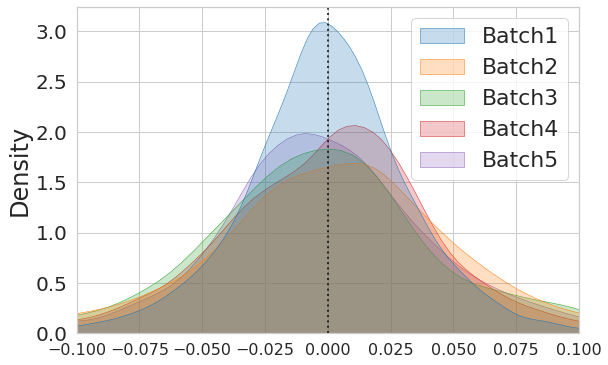

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.kdeplot(data=batch_shift_ic, fill=True, palette="tab10", alpha=1/4, linewidth=1/2)
g.set(xlim=(-0.1, 0.1))
matplotlib.pyplot.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')
matplotlib.pyplot.xticks(fontsize=16)
matplotlib.pyplot.show()

# Quantile normalization across all samples

In [ ]:
peaks_ic.head()

,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0,0,2.731190,3.039996,2.498900,3.146793,2.926058,3.101473,4.249783,3.659928,2.675828,2.698426,2.835321,3.263095,3.015066,2.938611,2.771732,2.994916,2.569723,2.977499,3.331975,2.662741,3.665733,3.645038,2.769425,2.743793,4.397969,3.612091,3.062474,3.608017,3.098851,3.949611,2.609377,3.924130,3.195544,4.520370,4.703177,2.949756,4.252155,...,3.684713,3.504004,3.118662,3.310416,3.110021,3.646444,3.556255,2.969109,2.971801,3.184817,2.769092,2.892342,3.024038,3.064213,3.085544,3.635307,3.859158,3.857018,3.728960,3.087690,3.087883,3.428445,3.493868,3.400716,3.214216,3.334671,3.384709,3.415102,2.978815,3.022200,3.021206,2.995128,3.012682,3.068779,3.026200,3.681500,3.728084,3.902864,3.798414,3.779298
1,EGM,0,1,2.577060,2.966918,2.478636,3.080018,2.975931,3.142122,4.154512,3.619230,2.579870,2.562354,2.487779,3.258477,2.886799,2.854834,2.756858,3.007140,2.691261,3.068997,3.254947,2.539483,3.745788,3.727281,2.766418,2.712809,4.476157,3.668902,3.185888,3.538519,3.105857,3.923285,2.471512,4.182124,3.390994,4.219277,4.737366,2.993527,4.222383,...,3.625102,3.257475,2.969984,2.943847,2.821723,3.572133,3.534212,2.957405,2.959623,3.138686,2.805983,2.881742,3.038560,3.072207,3.068547,3.562690,3.816319,3.637790,3.717931,3.045000,3.049544,3.361241,3.383137,3.186481,3.128215,3.269217,3.395243,3.347042,3.103678,3.182975,3.197100,3.191962,3.090010,3.086108,2.856756,3.666367,3.817882,3.767177,3.784470,3.692333
2,EGM,0,2,2.567796,3.102377,2.315301,3.174088,3.080577,3.078214,3.950247,3.553190,2.447427,2.567267,2.467664,3.299520,2.868828,2.944417,2.891972,2.964754,2.616670,2.956515,3.345296,2.543528,3.662276,3.662167,2.855282,2.924238,4.572164,3.640099,3.137590,3.662951,3.321059,4.618832,2.497167,4.263248,3.499691,4.645017,4.724440,2.949756,4.259571,...,3.372456,3.223758,3.059874,3.043612,2.866050,3.409097,3.457334,2.832361,2.832637,3.139151,2.979729,3.026377,3.250336,3.299959,3.271043,3.775912,3.706156,3.971052,3.853376,2.860173,2.848091,3.188977,3.151786,3.090118,3.307722,3.408314,3.476060,3.459793,3.107535,3.193450,3.201853,3.251763,3.087607,3.325044,2.495992,3.780564,3.908326,3.861871,3.913619,3.892816
3,EGM,0,3,2.700993,3.041685,2.328574,3.091159,2.993070,3.046918,4.165901,3.546743,2.492790,2.705565,2.633503,3.303501,2.936790,3.100368,2.895259,3.112989,2.514703,2.908327,3.495694,2.696874,3.828928,3.827009,2.881977,2.872404,4.615308,3.755558,3.043079,3.613132,3.223012,4.592933,2.670872,3.749708,3.376602,4.460777,4.687126,2.928184,4.299938,...,3.057176,3.492650,3.103422,3.275411,

In [ ]:
tdf = peaks_ic.transpose()
tdf.drop(['Treatment', 'Time', 'Replicate'], axis=0, inplace=True)
tdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
X59.01097,2.73119,2.57706,2.5678,2.70099,2.7692,2.79013,2.67034,2.57363,2.64512,2.63926,2.70838,2.57495,2.68681,2.71122,2.58749,2.65066,2.69528,2.68014,2.58424,2.71382,2.58154,2.74501,2.76084,2.62233,2.62314,2.75405,2.61058,2.71775,2.77319,2.69557,2.72674,2.73709,2.61409,2.69717,2.77397,2.6119,2.77276,2.61333,2.7134,2.51153,...,2.74258,2.72233,2.83656,2.86631,2.59779,2.89065,2.89974,2.57189,2.78291,2.89373,2.59451,2.60567,2.81929,2.55727,2.81556,2.72133,2.78462,2.76907,2.80327,2.69347,2.55507,2.74059,2.54804,2.71484,2.56635,2.79899,2.55017,2.75827,2.84766,2.85813,2.61486,2.81336,2.63747,2.66897,2.80628,2.77985,2.72402,2.68204,2.78801,2.61594
X61.017890000000001,3.04,2.96692,3.10238,3.04169,2.96768,3.10145,2.88533,3.07716,3.01193,3.0297,3.00606,2.99832,2.93144,3.04238,2.88025,3.04696,3.05248,2.92753,2.88181,3.02617,2.88311,2.85661,2.96837,2.95465,2.84346,3.05152,2.98786,3.10525,3.1105,3.02977,2.84181,3.09575,2.86659,2.87506,3.06698,3.04689,2.85617,2.9034,2.97108,2.84687,...,2.99439,3.09458,2.9333,3.0152,2.97699,3.10178,3.00758,3.11839,3.08985,2.89677,2.887,2.88102,2.93148,2.99219,3.05717,3.02685,2.95261,3.05485,2.97,2.94581,3.07005,3.02026,3.04646,3.08468,3.04388,2.94996,3.07399,2.94555,2.82831,2.82899,3.12386,2.95879,3.03799,3.13498,2.82458,3.17253,3.13353,3.03586,3.05139,2.86851
X67.016220000000004,2.4989,2.47864,2.3153,2.32857,2.80202,2.80901,2.45065,2.85055,2.44231,2.71945,2.7882,2.62703,2.55094,2.64378,2.76607,2.42473,2.82698,2.50317,2.81857,2.41914,2.69173,2.56367,2.47619,2.74572,2.72566,2.4363,2.46598,2.92157,2.82504,2.84078,2.6054,2.91915,2.55104,2.37805,2.38236,2.9071,2.77769,2.87123,2.30938,2.54563,...,2.52984,2.71073,2.22494,2.358,2.23744,2.26416,2.22482,2.71162,2.83584,2.75642,2.79552,2.65397,2.65295,2.76262,2.75609,2.78081,2.7164,2.74689,2.54877,2.3862,2.48308,2.6281,2.37754,2.3942,2.56329,2.4417,2.36108,2.58115,2.48748,2.63543,2.89947,2.62463,2.95681,2.49577,2.75829,2.96377,2.64762,2.96073,2.43415,2.50352
X74.021450000000002,3.14679,3.08002,3.17409,3.09116,3.0492,3.1989,3.04945,3.12581,3.08021,3.11467,2.9467,2.91034,3.01073,3.0774,3.03281,3.13457,3.10382,2.92707,2.90599,2.91612,2.98233,2.95595,3.03633,3.05843,2.95192,3.12994,3.05612,3.12499,2.95513,3.06951,2.97301,3.11434,2.96508,3.11285,3.10498,3.02346,3.03885,2.91961,3.11764,2.92017,...,3.06903,3.15889,2.98044,3.14903,3.06587,2.98897,3.00529,3.09047,3.06917,2.9906,3.1491,3.04293,3.1362,3.0499,3.14293,3.04424,3.06498,3.03903,3.0852,3.0516,3.09588,3.14599,3.12398,3.14197,3.08254,3.13694,3.0661,3.11406,2.94368,2.98962,3.27709,3.1147,3.12527,3.27699,2.99001,3.25154,3.24546,3.04779,3.04731,2.94816
X77.052040000000005,2.92606,2.97593,3.08058,2.99307,3.13175,3.16938,2.93939,3.05635,2.95223,2.9093,3.04788,3.06864,2.9834,3.06736,2.97775,2.90041,2.93812,2.90639,2.92655,3.0591,2.99785,3.01495,3.00188,3.02072,2.92529,3.0187,2.94648,3.12932,3.1227,3.08929,3.12356,3.12506,2.95529,2.94307,3.07191,2.94423,3.02765,2.8768,2.95344,2.87312,...,3.09968,3.1659,3.10793,3.22099,2.99435,3.20493,3.15483,2.99054,3.04549,3.20485,2.99443,2.97831,3.20057,2.94472,3.11321,3.11989,3.11359,2.98759,3.11361,3.06041,3.04997,2.94471,2.99157,3.05982,2.94453,2.94829,3.05985,3.13899,2.8265,3.23332,3.24179,3.18811,2.92342,2.80773,2.91895,2.76153,3.24078,2.94965,2.82997,3.04107


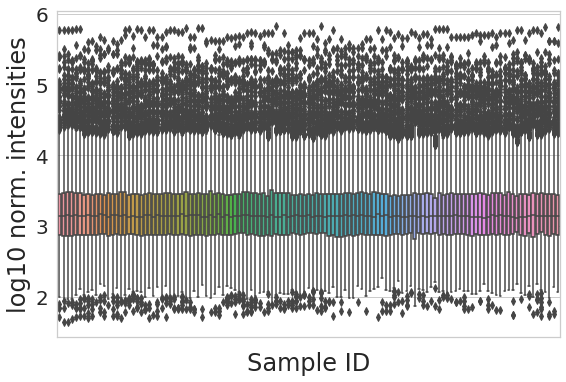

In [ ]:
matplotlib.pyplot.figure(figsize=(9, 6))
g = seaborn.boxplot(data=tdf)
g.set(xticklabels=[], ylabel='log10 norm. intensities', xlabel='Sample ID')
g.tick_params(bottom=False)
matplotlib.pyplot.show()

# Store data for downstream analysis

In [ ]:
storing_file = '/content/drive/MyDrive/hi/research/huvec/results/untargeted/cell_number_sample_and_batch_normalized_log10_intensities_untargeted_data.csv'
peaks_ic.to_csv(storing_file)
print(peaks_ic.shape)
peaks_ic.head()

(123, 1233)


,Treatment,Time,Replicate,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,X77.052040000000005,X77.052049999999994,X78.956580000000002,X78.956770000000006,X79.955420000000004,X80.962869999999995,X80.962720000000004,X82.951819999999998,X84.006739999999994,X84.043059999999997,X84.949100000000001,X85.027289999999994,X85.027019999999993,X85.027270000000001,X86.991519999999994,X87.006460000000004,X88.037970000000001,X88.037940000000006,X88.038039999999995,X88.03792,X89.022130000000004,X89.022099999999995,X89.040549999999996,X92.032160000000005,X92.031949999999995,X92.925600000000003,X93.043189999999996,X94.922759999999997,X96.919939999999997,X96.965789999999998,X96.967179999999999,X96.957989999999995,X96.965829999999997,...,X885.56862999999998,X885.57101,X886.53539000000001,X886.55880999999999,X886.57330999999999,X893.19449999999995,X893.21762000000001,X894.19538999999997,X894.21055000000001,X894.86288000000002,X906.21198000000004,X906.23701000000005,X918.79764999999998,X918.81568000000004,X918.83290999999997,X928.81326000000001,X928.82665999999995,X928.85361999999998,X928.86716999999999,X932.19215999999994,X932.20804999999996,X957.19478000000004,X957.21433999999999,X957.22663,X962.81850999999995,X962.83609000000001,X962.85298,X962.86944000000005,X968.30682999999999,X970.29764,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EGM,0,0,2.731190,3.039996,2.498900,3.146793,2.926058,3.101473,4.249783,3.659928,2.675828,2.698426,2.835321,3.263095,3.015066,2.938611,2.771732,2.994916,2.569723,2.977499,3.331975,2.662741,3.665733,3.645038,2.769425,2.743793,4.397969,3.612091,3.062474,3.608017,3.098851,3.949611,2.609377,3.924130,3.195544,4.520370,4.703177,2.949756,4.252155,...,3.684713,3.504004,3.118662,3.310416,3.110021,3.646444,3.556255,2.969109,2.971801,3.184817,2.769092,2.892342,3.024038,3.064213,3.085544,3.635307,3.859158,3.857018,3.728960,3.087690,3.087883,3.428445,3.493868,3.400716,3.214216,3.334671,3.384709,3.415102,2.978815,3.022200,3.021206,2.995128,3.012682,3.068779,3.026200,3.681500,3.728084,3.902864,3.798414,3.779298
1,EGM,0,1,2.577060,2.966918,2.478636,3.080018,2.975931,3.142122,4.154512,3.619230,2.579870,2.562354,2.487779,3.258477,2.886799,2.854834,2.756858,3.007140,2.691261,3.068997,3.254947,2.539483,3.745788,3.727281,2.766418,2.712809,4.476157,3.668902,3.185888,3.538519,3.105857,3.923285,2.471512,4.182124,3.390994,4.219277,4.737366,2.993527,4.222383,...,3.625102,3.257475,2.969984,2.943847,2.821723,3.572133,3.534212,2.957405,2.959623,3.138686,2.805983,2.881742,3.038560,3.072207,3.068547,3.562690,3.816319,3.637790,3.717931,3.045000,3.049544,3.361241,3.383137,3.186481,3.128215,3.269217,3.395243,3.347042,3.103678,3.182975,3.197100,3.191962,3.090010,3.086108,2.856756,3.666367,3.817882,3.767177,3.784470,3.692333
2,EGM,0,2,2.567796,3.102377,2.315301,3.174088,3.080577,3.078214,3.950247,3.553190,2.447427,2.567267,2.467664,3.299520,2.868828,2.944417,2.891972,2.964754,2.616670,2.956515,3.345296,2.543528,3.662276,3.662167,2.855282,2.924238,4.572164,3.640099,3.137590,3.662951,3.321059,4.618832,2.497167,4.263248,3.499691,4.645017,4.724440,2.949756,4.259571,...,3.372456,3.223758,3.059874,3.043612,2.866050,3.409097,3.457334,2.832361,2.832637,3.139151,2.979729,3.026377,3.250336,3.299959,3.271043,3.775912,3.706156,3.971052,3.853376,2.860173,2.848091,3.188977,3.151786,3.090118,3.307722,3.408314,3.476060,3.459793,3.107535,3.193450,3.201853,3.251763,3.087607,3.325044,2.495992,3.780564,3.908326,3.861871,3.913619,3.892816
3,EGM,0,3,2.700993,3.041685,2.328574,3.091159,2.993070,3.046918,4.165901,3.546743,2.492790,2.705565,2.633503,3.303501,2.936790,3.100368,2.895259,3.112989,2.514703,2.908327,3.495694,2.696874,3.828928,3.827009,2.881977,2.872404,4.615308,3.755558,3.043079,3.613132,3.223012,4.592933,2.670872,3.749708,3.376602,4.460777,4.687126,2.928184,4.299938,...,3.057176,3.492650,3.103422,3.275411,